# Bank Marketing

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
  


    Number of Instances: 41188 

    Number of Attributes: 20 + output attribute.

    Attribute information:

   

   Input variables:
   
### Bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   ### Social and economic context attributes
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

#### We will be predicting where a client will buy the term deposit or not using machine learning algorithms. Also we would be using gain and lift chart to improve the efficiency of our marketing campaign.

In [182]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

from sklearn.metrics import roc_curve


In [183]:
bank=pd.read_csv('bank-additional-full.csv',sep=';')

# Exploring data

In [184]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [185]:
from scipy.stats import chisquare,chi2_contingency

In [186]:
bank['y'].value_counts()/bank['y'].count()*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

There is an 11.26 percent chance of a customer subscribing to Term Deposit

# Exploratory data analysis

### 1) Age

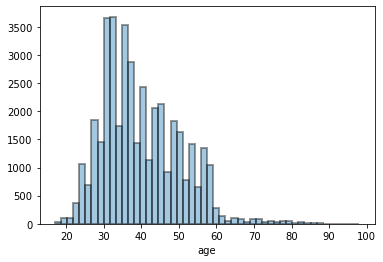

In [187]:
sns.distplot(bank['age'],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))

In [188]:
#a fucntion to create contingency tables
def contingency(a,b,norm=False):
    table=pd.crosstab(bank[a],bank[b],normalize=norm)
    return table


In [189]:
contingency('age','y','columns').sort_values('yes',ascending=False)*100

y,no,yes
age,,
31,4.725293,4.741379
33,4.440735,4.525862
30,4.137025,4.353448
29,3.466674,4.008621
34,4.271096,3.965517
...,...,...
98,0.000000,0.043103
87,0.000000,0.021552
91,0.005472,0.000000


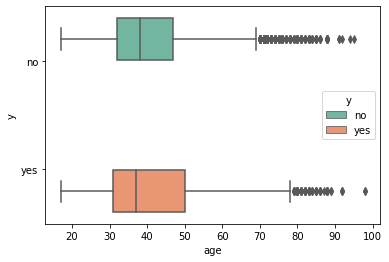

In [190]:
sns.boxplot(bank['age'],bank['y'],hue=bank['y'],palette='Set2')

Age may not be a major factor looking at the distribution of ages for subscription to the term deposit

### 2) Job

In [191]:
contingency('y','job','index')*100

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,24.816679,23.574477,3.644522,2.610266,7.102988,3.518660,3.480355,9.975922,1.641677,16.452337,2.380431,0.801685
yes,29.137931,13.750000,2.672414,2.284483,7.068966,9.353448,3.211207,6.961207,5.926724,15.732759,3.103448,0.797414


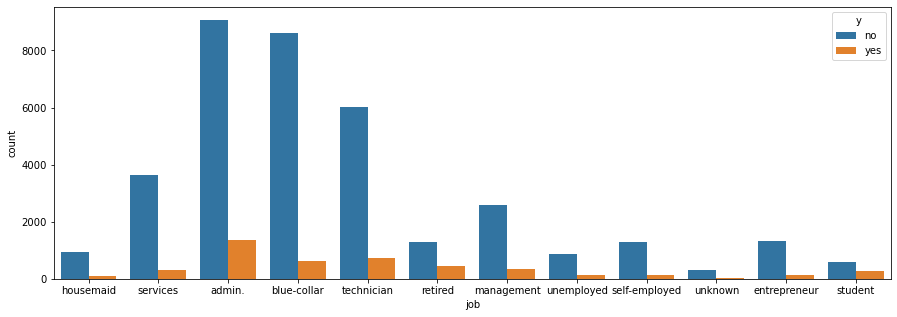

In [192]:
plt.figure(figsize=(15,5))
sns.countplot(bank['job'],hue=bank['y'])

The people from having administrative, technician and blue collored job have higher chances of subscribing

### 3) Marital

In [193]:
contingency('y','marital','index')*100

marital,divorced,married,single,unknown
y,,,,
no,11.316625,61.278319,27.219000,0.186057
yes,10.258621,54.568966,34.913793,0.258621


Married people are most likely to subscribe to term deopsit 

### 4) Education

In [194]:
contingency('y','education','index')*100

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,10.255007,5.756813,15.245704,23.213309,0.038306,12.717522,28.723870,4.049469
yes,9.224138,4.051724,10.193966,22.219828,0.086207,12.823276,35.991379,5.409483


People with university degree have high chances of subscribing at 35%

### 5) Default

In [195]:
contingency('y','default','index')*100

default,no,unknown,yes
y,,,
no,77.681405,22.310386,0.008208
yes,90.452586,9.547414,0.000000


none of the people who had defaulted created subscribed to term deposit

90% of the people who did not default subscribed 

### 6) Housing

In [196]:
contingency('y','housing','index')*100

housing,no,unknown,yes
y,,,
no,45.408777,2.416001,52.175222
yes,43.663793,2.306034,54.030172


No major impact of housing on subscription

### 7) Loan

In [197]:
contingency('y','loan','index')*100

loan,no,unknown,yes
y,,,
no,82.357448,2.416001,15.226551
yes,82.974138,2.306034,14.719828


Of the people who subscribed to the term deposit did not have  personal loan

### 8) Contact

In [198]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [199]:
contingency('y','contact','index')*100

contact,cellular,telephone
y,,
no,60.991026,39.008974
yes,83.038793,16.961207


### 9) Month

In [200]:
contingency('y','month','columns')*100

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,79.521277,89.397863,51.098901,90.953443,89.48853,49.450549,93.565255,89.856133,56.128134,55.087719
yes,20.478723,10.602137,48.901099,9.046557,10.51147,50.549451,6.434745,10.143867,43.871866,44.912281


More people tend the subscribe (40-50) percent in the months of march, october,september and december

In [201]:
contingency('y','month','index')*100

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,5.726716,15.111634,0.254460,17.853234,13.021232,0.738755,35.249535,10.082631,1.102660,0.859144
yes,11.616379,14.116379,1.918103,13.987069,12.047414,5.948276,19.094828,8.965517,6.788793,5.517241


Of  the people who subscribed maximun subscribed in march

### 10) Day of week

In [202]:
contingency('y','day_of_week','columns')*100

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,89.191261,90.05168,87.881248,88.220025,88.332924
yes,10.808739,9.94832,12.118752,11.779975,11.667076


no major impact of day of the week on subscription

### 11) Duration

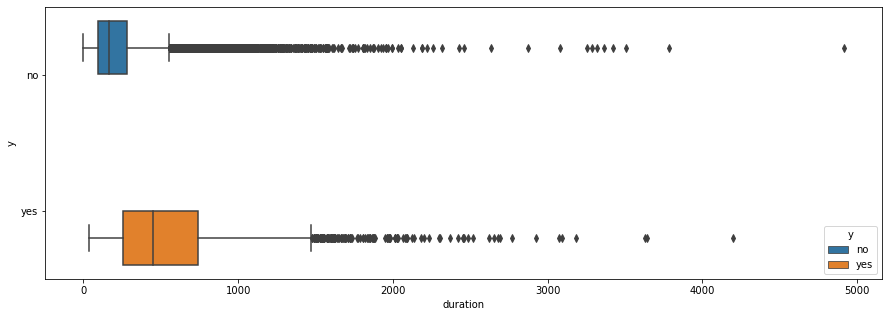

In [203]:
plt.figure(figsize=(15,5))
sns.boxplot(bank['duration'],bank['y'],hue= bank['y'])

Clearly show that calls with higher duartions can covert potential customers to subscribers 

### 12) Campaign

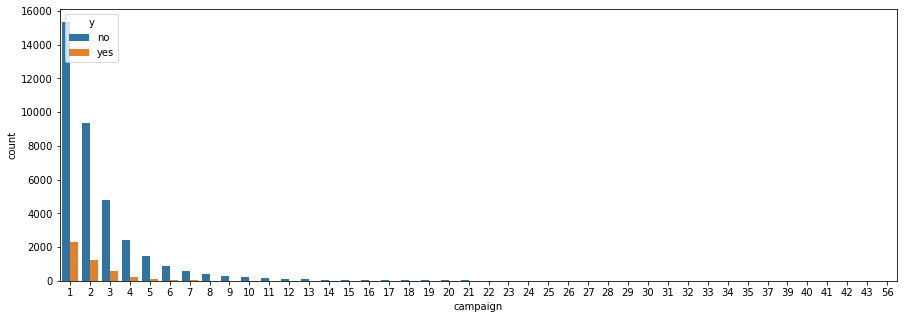

In [204]:
plt.figure(figsize=(15,5))
sns.countplot(bank['campaign'],hue=bank['y'])

In [205]:
contingency('y','campaign','index')*100

campaign,1,2,3,4,5,6,7,8,9,10,...,33,34,35,37,39,40,41,42,43,56
y,,,,,,,,,,,,,,,,,,,,,
no,41.977673,25.607420,13.043121,6.572179,4.046733,2.473460,1.617052,1.047937,0.727810,0.582795,...,0.010945,0.008208,0.013681,0.002736,0.002736,0.005472,0.002736,0.005472,0.005472,0.002736
yes,49.568966,26.099138,12.370690,5.366379,2.586207,1.616379,0.818966,0.366379,0.366379,0.258621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Of the people who subscribe 50% did it in first call and around 88% subscribed in first 3 calls

### 13) pdays

In [206]:
bank['pdays'].value_counts()/bank['pdays'].count()*100

999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
19      0.007284
22      0.007284
21      0.004856
26      0.002428
20      0.002428
25      0.002428
27      0.002428
Name: pdays, dtype: float64

96 percent of the clients were never contacted before

In [207]:
(contingency('y','pdays','index')*100).T

y,no,yes
pdays,,
0,0.013681,0.215517
1,0.049250,0.172414
2,0.065667,0.797414
3,0.385794,6.422414
4,0.150487,1.357759
5,0.046514,0.625000
6,0.336544,6.228448
7,0.054723,0.862069
8,0.016417,0.258621


Of the people who subscribed around 21 percent were previously contacted in the last 27 days. 79 perccent were never conatcted before

### 14) Previous

In [208]:
contingency('y','previous','index')*100

previous,0,1,2,3,4,5,6,7
y,,,,,,,,
no,88.710737,9.833643,1.105396,0.240779,0.087556,0.013681,0.005472,0.002736
yes,67.693966,20.840517,7.543103,2.758621,0.818966,0.280172,0.064655,0.000000


we can see that the percentage of people subscribing falls as the number of contacts increase. 

  ### 15) Poutcome

In [209]:
contingency('y','poutcome','index')*100

poutcome,failure,nonexistent,success
y,,,
no,9.978658,88.710737,1.310605
yes,13.038793,67.693966,19.267241


around 19 percent subscribed once again after subscribing in the previous campaign.

### 16) Emp.var.rate

In [210]:
bank['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [211]:
contingency('y','emp.var.rate','index')*100

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,1.688191,0.229835,2.924921,21.131115,1.012367,0.913867,0.024625,9.442377,20.583890,42.048813
yes,9.784483,1.896552,12.801724,31.487069,8.685345,6.487069,0.021552,5.000000,5.172414,18.663793


In [212]:
contingency('y','emp.var.rate','columns')*100

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,57.609711,48.837209,64.281419,84.091899,47.865459,52.598425,90.0,93.700787,96.908412,94.665517
yes,42.390289,51.162791,35.718581,15.908101,52.134541,47.401575,10.0,6.299213,3.091588,5.334483


majority of the people who said yes,said yes when the emplyment variation rate was  -.9,-1.8,1.4 and -3.4

### 17) Cons.price.index


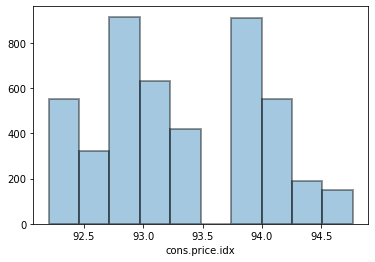

In [213]:
sns.distplot(bank[bank['y']=='yes']['cons.price.idx'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=10)

### 18) Cons.conf.idx

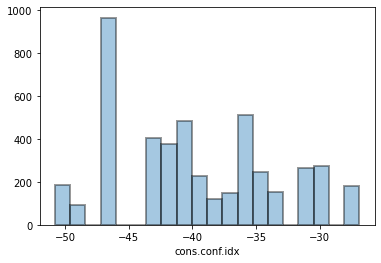

In [214]:
sns.distplot(bank[bank['y']=='yes']['cons.conf.idx'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=20)

### 19) Euribor3m

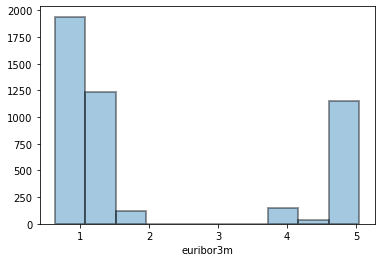

In [215]:
sns.distplot(bank[bank['y']=='yes']['euribor3m'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=10)

### 20) Nr.employed

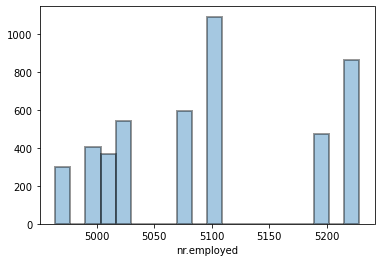

In [216]:
sns.distplot(bank[bank['y']=='yes']['nr.employed'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=20)

# Preprocessing

In [217]:
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [218]:
bank=bank.drop_duplicates()

In [219]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [220]:
y=bank['y'].map({'no':0,'yes':1})

In [221]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [222]:
bank['month']=bank['month'].map({'dec':12,'may':5, 'feb':2, 'nov':11, 'oct':10, 'sep':9, 'mar':3, 'apr':4,
       'aug':8, 'jun':6, 'jan':1, 'jul':7})


C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [223]:
bank['day_of_week']=bank['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})

C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [224]:
bank['education']=bank['education'].map({'basic.4y':2, 'high.school':5, 'basic.6y':3, 'basic.9y':4,
       'professional.course':6, 'unknown':1, 'university.degree':7,
       'illiterate':0})

C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
bank.drop('duration',inplace=True,axis=1)

C:\Users\vivji\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [226]:
bank.drop('y',axis=1,inplace=True)

### Getting dummy varaibles

In [227]:
bank=bank.join(pd.get_dummies(bank['job'],drop_first=True))

In [228]:
bank.drop('job',inplace=True,axis=1)

In [229]:
from sklearn.preprocessing import LabelEncoder

In [230]:
le=LabelEncoder()

In [231]:
cols=['marital','default','housing','loan','poutcome','contact']

In [232]:
for i in cols:
    bank[i]=le.fit_transform(bank[i])

In [233]:
X=bank

In [234]:
X


,age,marital,education,default,housing,loan,contact,month,day_of_week,campaign,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,56,1,2,0,0,0,1,5,1,1,...,0,1,0,0,0,0,0,0,0,0
1,57,1,5,1,0,0,1,5,1,1,...,0,0,0,0,0,1,0,0,0,0
2,37,1,5,0,2,0,1,5,1,1,...,0,0,0,0,0,1,0,0,0,0
3,40,1,3,0,0,0,1,5,1,1,...,0,0,0,0,0,0,0,0,0,0
4,56,1,5,0,0,2,1,5,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,6,0,2,0,0,11,5,1,...,0,0,0,1,0,0,0,0,0,0
41184,46,1,6,0,0,0,0,11,5,1,...,0,0,0,0,0,0,0,0,0,0
41185,56,1,7,0,2,0,0,11,5,2,...,0,0,0,1,0,0,0,0,0,0
41186,44,1,6,0,0,0,0,11,5,1,...,0,0,0,0,0,0,0,1,0,0


## Checking for multicolinearity 

In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [236]:
calc_vif(X).sort_values('VIF',ascending=False)

,variables,VIF
17,nr.employed,39772.597549
14,cons.price.idx,35034.333280
16,euribor3m,357.894288
10,pdays,165.496918
15,cons.conf.idx,124.992006
13,emp.var.rate,41.113375
12,poutcome,34.120622
0,age,25.646681
7,month,22.529107
2,education,13.796491


In [237]:
X.drop('cons.price.idx',axis=1,inplace=True)
X.drop('euribor3m',axis=1,inplace=True)
X.drop('nr.employed',axis=1,inplace=True)
X.drop('cons.conf.idx',axis=1,inplace=True)
X.drop('pdays',axis=1,inplace=True)
X.drop('month',axis=1,inplace=True)
X.drop('education',axis=1,inplace=True)
X.drop('poutcome',axis=1,inplace=True)
X.drop('age',axis=1,inplace=True)

In [238]:
calc_vif(X).sort_values('VIF',ascending=False)

,variables,VIF
5,day_of_week,4.010661
0,marital,3.637344
2,housing,2.024370
4,contact,1.839224
6,campaign,1.808906
9,blue-collar,1.737883
17,technician,1.480995
8,emp.var.rate,1.472414
1,default,1.371438
7,previous,1.353006


In [239]:
#X=pd.get_dummies(bank,columns=['job','marital','education','default','housing','loan','poutcome'],drop_first=True)

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

# Balancing dataset using smote

In [241]:
y.value_counts()/y.count()*100

0    88.733728
1    11.266272
Name: y, dtype: float64

## The imbalance in classes

The classes in the data are highly imbalanced. 
The minority class ie the number of people who subscribed to term deposit is just 11 percent of the total. 
This 11 percent imay not be wnough for the machine learning algorithms to learn the data for the minority class properly thus causing miscalssification for the minority class.

Thus over sampling of the minority class is done to increase the number of observations and balance the data

I have used one of the popular techniques Synthetic Minority Over-sampling Technique(SMOTE) to do the oversampling.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [242]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
 

In [243]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [244]:
X_train.shape

(27587, 20)

In [245]:
X_train_res.shape

(48958, 20)

In [246]:
y_train_res[y_train_res==1].sum()

24479

In [247]:
len(y_train_res[y_train_res==0])

24479

# Logistic regression

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
#scaling because the gradient descent would not converge

In [250]:
ss=StandardScaler()

In [251]:
X_train_scaled=ss.fit_transform(X_train)

In [252]:
X_test_scaled=ss.transform(X_test)

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
lr=LogisticRegression()

In [255]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [256]:
predicted_y=lr.predict(X_test_scaled)

In [257]:
from sklearn.metrics import classification_report,confusion_matrix


In [258]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     12058
           1       0.54      0.05      0.09      1531

    accuracy                           0.89     13589
   macro avg       0.72      0.52      0.51     13589
weighted avg       0.85      0.89      0.84     13589



In [259]:
confusion_matrix(y_test,predicted_y)

array([[11996,    62],
       [ 1458,    73]], dtype=int64)

In [260]:
lr_pred_prob=lr.predict_proba(X_test_scaled)

In [261]:
gain=lr_pred_prob

C:\Users\vivji\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


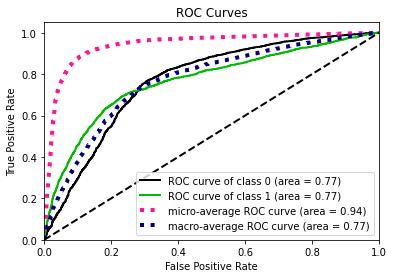

In [262]:
skplt.metrics.plot_roc_curve(y_test, lr_pred_prob)
plt.show()

In [263]:
#fucntion to calculate right cutoff probability using youden's J statistic
def threshold(y_test,prob):
    # calculate roc curves

    fpr, tpr, thresholds=roc_curve(y_test,prob[:,1])
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    return best_thresh

In [264]:
thresh=threshold(y_test,lr_pred_prob)

In [265]:
lr_pred_prob=lr_pred_prob[:,1]

In [266]:
lr_pred_prob[lr_pred_prob>thresh]=1

In [267]:
lr_pred_prob[lr_pred_prob<=thresh]=0

In [268]:
confusion_matrix(y_test,lr_pred_prob)

array([[9225, 2833],
       [ 468, 1063]], dtype=int64)

In [269]:
print(classification_report(y_test,lr_pred_prob))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     12058
           1       0.27      0.69      0.39      1531

    accuracy                           0.76     13589
   macro avg       0.61      0.73      0.62     13589
weighted avg       0.88      0.76      0.80     13589



the recall value increased to a great extend afterchosing the right threshold value using the youdens index

## Interpreting the model

In [270]:
Coef=pd.DataFrame((lr.coef_).T)

In [271]:
Coef['variables']=X.columns

In [272]:
Coef

,0,variables
0,0.057897,marital
1,-0.152280,default
2,-0.035545,housing
3,0.011576,loan
4,-0.160516,contact
5,0.045755,day_of_week
6,-0.153653,campaign
7,0.210483,previous
8,-0.630928,emp.var.rate
9,-0.188208,blue-collar


In [273]:
Coef['odds ratio']=np.e**lr.coef_.T

In [274]:
Coef['percentages inc/dec']=(Coef['odds ratio']-1) *100

In [275]:
Coef.sort_values(by='percentages inc/dec',ascending=False)

,0,variables,odds ratio,percentages inc/dec
7,0.210483,previous,1.234274,23.427354
13,0.117691,retired,1.124897,12.489690
16,0.059935,student,1.061768,6.176802
0,0.057897,marital,1.059606,5.960573
5,0.045755,day_of_week,1.046818,4.681754
11,0.018584,housemaid,1.018758,1.875819
19,0.012632,unknown,1.012712,1.271222
3,0.011576,loan,1.011643,1.164312
18,-0.001052,unemployed,0.998949,-0.105106
12,-0.025304,management,0.975013,-2.498670


# Basic interpretations using linear model

The log of odds are monotonic in nature and increase in probability also causes increase in log of odds.
the odds ratio can be used for interpretation of coefficients.

Increase in one unit of the emp.var.rate reduces the likelihood of Term deposit subscription by 46.8 percent

Being a blue collared worker also reduces the likelihood by 17 percent

The number of times the customer has been contacted previously increases the likelihood by 23%

The being retired also increases the likelihhod by 12.4 %



# Logistic regresion using smote

In [276]:
from sklearn.preprocessing import StandardScaler

In [277]:
#scaling because the gradient descent would not converge

In [278]:
ss=StandardScaler()

In [279]:
X_train_lin_scaled=ss.fit_transform(X_train_res)

In [280]:
X_test_scaled=ss.transform(X_test)

In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
lr=LogisticRegression()

In [283]:
lr.fit(X_train_lin_scaled,y_train_res)

LogisticRegression()

In [284]:
lr_smote=lr.predict_proba(X_test_scaled)

In [285]:
thresh=threshold(y_test,lr_smote)

In [286]:
lr_smote=lr_smote[:,1]

In [287]:
lr_smote[lr_smote>thresh]=1

In [288]:
lr_smote[lr_smote<=thresh]=0

In [289]:
confusion_matrix(y_test,lr_smote)

array([[8275, 3783],
       [ 482, 1049]], dtype=int64)

In [290]:
print(classification_report(y_test,lr_smote))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     12058
           1       0.22      0.69      0.33      1531

    accuracy                           0.69     13589
   macro avg       0.58      0.69      0.56     13589
weighted avg       0.86      0.69      0.74     13589



we can see oversampling of the minority classs did not help the logistic model to imrpove the recall value

# Polynomial logistic regression

In [291]:
from sklearn.preprocessing import PolynomialFeatures

In [292]:
pf=PolynomialFeatures(2)

In [293]:
X_train_poly=pf.fit_transform(X_train)

In [294]:
X_test_poly=pf.transform(X_test)

In [295]:
X_train_poly_scaled=ss.fit_transform(X_train_poly)

In [296]:
X_test_poly_scaled=ss.transform(X_test_poly)

In [297]:
lrp=LogisticRegression(max_iter=2000)

In [298]:
lrp.fit(X_train_poly_scaled,y_train)

LogisticRegression(max_iter=2000)

In [299]:
poly_pred=lrp.predict_proba(X_test_poly_scaled)

In [300]:
thresh=threshold(y_test,poly_pred)

In [301]:
poly_pred=poly_pred[:,1]

In [302]:
poly_pred[poly_pred>thresh]=1
poly_pred[poly_pred<=thresh]=0

In [303]:
confusion_matrix(y_test,poly_pred)

array([[9670, 2388],
       [ 530, 1001]], dtype=int64)

In [304]:
print(classification_report(y_test,poly_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     12058
           1       0.30      0.65      0.41      1531

    accuracy                           0.79     13589
   macro avg       0.62      0.73      0.64     13589
weighted avg       0.87      0.79      0.82     13589



Polynomial logistic regression with degree 2 also did not show any improvement

Increasing the degrees worsened the results

# Polynomial logistic regression with smote

In [305]:
X_train_res_poly=pf.fit_transform(X_train_res)

In [306]:
X_test_poly=pf.transform(X_test)

In [307]:
X_train_poly_res_scaled=ss.fit_transform(X_train_res_poly)

In [308]:
X_test_poly_scaled=ss.transform(X_test_poly)

In [309]:
lrps=LogisticRegression(max_iter=2000)

In [310]:
lrps.fit(X_train_poly_res_scaled,y_train_res)

LogisticRegression(max_iter=2000)

In [311]:
poly_pred=lrps.predict_proba(X_test_poly_scaled)

In [312]:
thresh=threshold(y_test,poly_pred)

In [313]:
poly_pred=poly_pred[:,1]

In [314]:
poly_pred[poly_pred>thresh]=1
poly_pred[poly_pred<=thresh]=0

In [315]:
confusion_matrix(y_test,poly_pred)

array([[9329, 2729],
       [ 629,  902]], dtype=int64)

In [316]:
print(classification_report(y_test,poly_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     12058
           1       0.25      0.59      0.35      1531

    accuracy                           0.75     13589
   macro avg       0.59      0.68      0.60     13589
weighted avg       0.86      0.75      0.79     13589



Oversampling of the minority class did not help the polynomial logistic regression to imrove the result. It actaully reduced to recall of the class of interest here

# Random Forest Classifier

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
rfc=RandomForestClassifier(n_estimators=100)

In [319]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [320]:
rfc_pred=rfc.predict(X_test)

In [321]:
confusion_matrix(y_test,rfc_pred)

array([[11609,   449],
       [ 1234,   297]], dtype=int64)

In [322]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12058
           1       0.40      0.19      0.26      1531

    accuracy                           0.88     13589
   macro avg       0.65      0.58      0.60     13589
weighted avg       0.85      0.88      0.86     13589



In [323]:
rfc_prob=rfc.predict_proba(X_test)

C:\Users\vivji\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


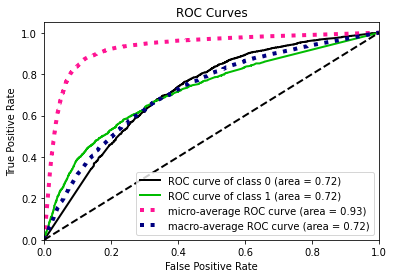

In [324]:
skplt.metrics.plot_roc_curve(y_test, rfc_prob)
plt.show()

In [325]:
roc_auc_score(y_test,rfc_prob[:,1])

0.7184076766345636

In [326]:
thresh=threshold(y_test,rfc_prob)

In [327]:
rfc_prob=rfc_prob[:,1]

In [328]:
rfc_prob[rfc_prob>thresh]=1
rfc_prob[rfc_prob<=thresh]=0

In [329]:
print(classification_report(y_test,rfc_prob))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84     12058
           1       0.24      0.58      0.34      1531

    accuracy                           0.74     13589
   macro avg       0.59      0.67      0.59     13589
weighted avg       0.86      0.74      0.78     13589



In [330]:
confusion_matrix(y_test,rfc_prob)

array([[9185, 2873],
       [ 640,  891]], dtype=int64)

# RFC with SMOTE

In [331]:
rfcs=RandomForestClassifier(n_estimators=100)

In [332]:
rfcs.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [333]:
pred_smote=rfcs.predict(X_test)

In [334]:
confusion_matrix(y_test,pred_smote)

array([[9833, 2225],
       [ 870,  661]], dtype=int64)

In [335]:
smote_prob=rfcs.predict_proba(X_test)

In [336]:
thresh=threshold(y_test,smote_prob)

In [337]:
smote_prob=smote_prob[:,1]

In [338]:
smote_prob[smote_prob>thresh]=1
smote_prob[smote_prob<=thresh]=0

In [339]:
print(classification_report(y_test,smote_prob))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     12058
           1       0.20      0.65      0.31      1531

    accuracy                           0.67     13589
   macro avg       0.57      0.66      0.55     13589
weighted avg       0.85      0.67      0.73     13589



In [340]:
confusion_matrix(y_test,smote_prob)

array([[8164, 3894],
       [ 542,  989]], dtype=int64)

Using smote for oversampling with RFC has improved the recall value of our minority class 

# CONCLUSIONS 
1)Bad precision will mean some negatives are getting classified as positives

2)The recall value of the class label 1 has been given the highest importance as it is the topic of interest here.

3) Good recall value leads to right identification of customers who will subscribe to the term deposit.

4)Youden's J statistic has been used to find the right cutoff probability from classification. 

5)The Youden's J statistic meethod  is also giving low values(<0.5) of threshold because we want all customers who might subscribe the term deposit to get classified as potential buyers 

6)This is also causing some customers who  wont buy the loan being classified as potential buyers. 

7)We have tried to use multiple algorithms to get better values of recall for the class of interest  

8) We have tried to fit logistic regression,polynomial logistic regression,logistic regression with degree 2,polynomial logistic regression with degree 2, Random forest classifier, and random forest classifier.

9) SMOTE has been used to oversample to minority class and to balance the data.


10)The Random forest classifier with SMOTE and logistic regression gave us good recall values of the class 1 but logistic regression outpermormed.


 # GAIN AND LIFT CHARTS
 

The organisation incurs cost for each customer contact and would like to reduce the number of people contacted and to increase the response level of the customers.

To achieve this, gains charts are used. 

The probabilities of subscribing to the term deposit are sorted in decending order and are plotted on x axis. the percentage of subscribers are plotted on y axis.


In [341]:
smote_prob=rfc.predict_proba(X_test)

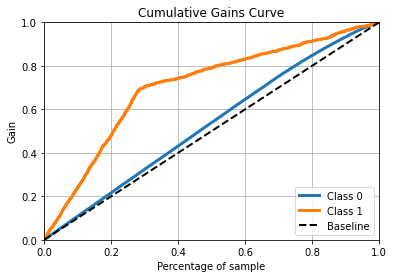

In [342]:
skplt.metrics.plot_cumulative_gain(y_test,gain)

from the above chart we can see that if we target the first 50 percent of the sample in the test data(sorted by descending order of predicted probabilities) we could almost reach 80 percent of the positive respondents. this saves the cost of reaching the rest 50 percent of the people and gives really high response level causing a successful marketing campaign

#### The lift chart shows how benifical using a ML model can be as compared to just randomly selecting customer to target the product

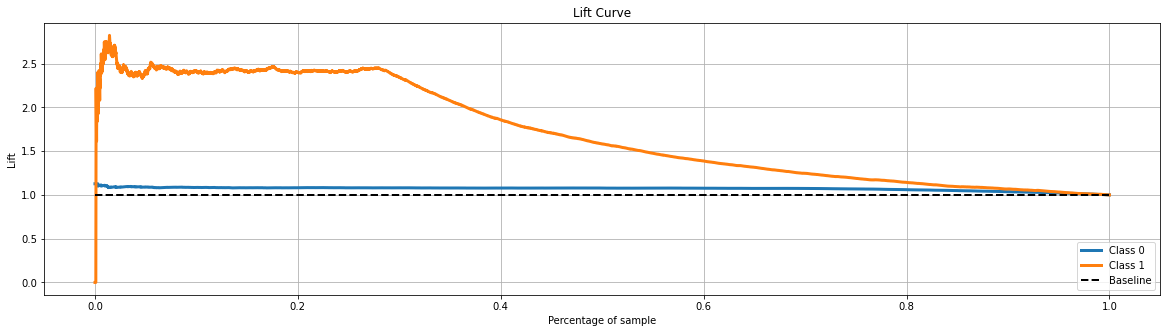

In [343]:

skplt.metrics.plot_lift_curve(y_test,gain,figsize=(20,5))


From the chart we can see that we are around 2.7 times more likely to convert a potential buyer for the first 1-2 % of our sample as compared to not using a model at all. similarly we are around 1.5 times likely to convert a potential buyer in the first 50 percent of the sample by using our model.